In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from davenet import Neuron, Layer, Sigmoid
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train_reshaped = x_train.reshape((len(x_train), 28*28))
x_test_reshaped = x_test.reshape((len(x_test), 28*28))

In [4]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

x_train_reshaped = MinMaxScaler().fit_transform(x_train_reshaped)
x_test_reshaped = MinMaxScaler().fit_transform(x_test_reshaped)
y_train_enc = OneHotEncoder(sparse=False).fit_transform(y_train.reshape(-1, 1))
y_test_enc = OneHotEncoder(sparse=False).fit_transform(y_test.reshape(-1, 1))

In [5]:
l0 = Layer(100, Sigmoid(), 28*28)
print(l0)
l1 = Layer(50, Sigmoid())(l0)
print(l1)
output = Layer(10, Sigmoid())(l1)
print(output)

Layer(num_neurons=100, activation=Sigmoid(name='sigmoid'), input_shape=784, neurons=[Neuron(input_shape=784, activation_function=Sigmoid(name='sigmoid'), weights=array([ 0.89665919,  0.910109  ,  0.77229907,  0.1922926 ,  0.29401836,
        0.99832432, -0.93577231, -0.24739891, -0.07207759,  0.71324458,
        0.58778063,  0.91545483, -0.29366777,  0.37737291,  0.02658062,
       -0.33306948,  0.30928512,  0.8346582 ,  0.07850899, -0.62801086,
       -0.37029326,  0.83666407,  0.53773453, -0.11635946,  0.5643719 ,
        0.01930193,  0.23320463,  0.46024352, -0.13338033, -0.51629576,
        0.30661751, -0.74366324, -0.52665384,  0.92539928, -0.21168776,
        0.87389406,  0.19084439,  0.55043169, -0.57954849, -0.11592199,
        0.90691841, -0.31024479,  0.17234706, -0.94082613,  0.55561287,
        0.5426517 , -0.7916418 , -0.22495448, -0.79682886, -0.80446473,
       -0.13766214, -0.34123238, -0.64896537,  0.529042  , -0.33250506,
        0.00484901,  0.80516869, -0.09559851, 

In [6]:
from tqdm import tqdm

lr = 0.05

all_E = []
for i in range(1000):
    epoch_E = []
    idx = np.random.choice(np.arange(len(x_train)), size=16, replace=False)
    for x, y in zip(x_train_reshaped[idx], y_train_enc[idx]):
        a0 = l0.forward(x)
        a1 = l1.forward(a0)
        o = output.forward(a1)
        o = np.squeeze(o)

        E = 0.5*np.sum((y - o)**2)
        epoch_E += [E]
        E_prime = (o - y)

        output.backward(E_prime)
        l1.backward(np.dot(output.weights.T, output.error))
        l0.backward(np.dot(l1.weights.T, l1.error))
    

    if i % 100 == 0:
        lr /= 2
    output.update_weights(lr)
    l1.update_weights(lr)
    l0.update_weights(lr)
        
    all_E += [np.mean(epoch_E)]
    print(all_E[-1])
    
    

1.5487922004417571
0.48135519661280096
0.49148888594791573
0.46093997885051285
0.44845009022348087
0.4968404897131595
0.45942145248622734
0.6771502855242897
0.6572792658600246
0.5366949380648174
0.47454748435401706
0.4821841816513448
0.4565945943413152
0.5355838318978621
0.5169991607343487
0.5026246662179148
0.5155162737777896
0.4996961798701884
0.5416741029150238
0.5046476250563054
0.48361069185826505
0.4901893305058376
0.45373129436689985
0.44550710004099486
0.4439743626958786
0.42276999444674296
0.4765352778979365
0.4626510735315656
0.46082306300505294
0.5135072210698806
0.430956481238124
0.42979538908422765
0.530347672858849
0.4458371318691386
0.40239327114600354
0.43864766501088226
0.4638895150190362
0.4703622591682841
0.547724279061591
0.4353705274073182
0.397772764700934
0.3873894291422657
0.46597751936656734
0.4749902423492035
0.3726907482861228
0.4332940186903093
0.4439424723358296
0.5164384568824469
0.3818600014775176
0.37888911428932637
0.47551840945265317
0.3897130274627099

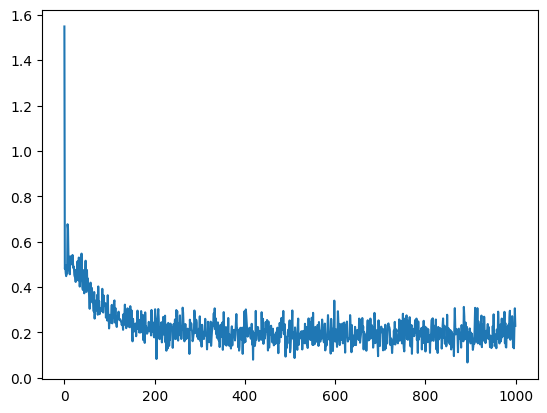

In [7]:
plt.figure()
plt.plot(all_E)
plt.show()

In [8]:
ind = np.random.choice(np.arange(len(x_test_reshaped)))

xx = x_test_reshaped[ind, :]
yy = np.argmax(y_test_enc[ind])

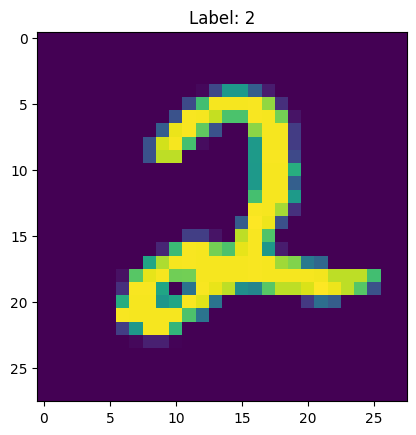

In [9]:
plt.figure()
plt.imshow(np.reshape(xx, (28, 28)))
plt.title(f'Label: {yy}')
plt.show()



In [12]:
y_pred = []
for xx in x_test_reshaped:
    a0 = l0.forward(xx)
    a1 = l1.forward(a0)
    o = output.forward(a1)
    o = np.squeeze(o)

    y_pred += [o]

In [16]:
y_pred = np.argmax(y_pred, axis=1)

In [17]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].